In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [23]:
df = pd.read_csv("grade_data.csv")
df

,Study_Hours,Attendance,Assignments_Completed,Grade
0,4.370861,84.908086,12,0
1,9.556429,76.804818,7,1
2,7.587945,65.476381,12,0
3,6.387926,90.689751,9,0
4,2.404168,84.236559,5,1
...,...,...,...,...
495,4.180170,54.579104,9,0
496,6.252905,95.865679,8,1
497,1.699612,56.840932,14,2
498,9.769553,97.511868,5,1


In [24]:
x = df.drop("Grade",axis=1)
y = df["Grade"]

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=23)

In [26]:
model = LogisticRegression(multi_class="multinomial")
model.fit(x_train,y_train)

c:\Users\91702\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\91702\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'multinomial'


In [27]:
y_pred = model.predict(x_test)
y_pred
r2 = r2_score(y_test ,y_pred)
print(r2)
y_prob = model.predict_proba(x_test)
y_prob

-0.43575017946877326


array([[0.14640779, 0.84435303, 0.00923918],
       [0.11268808, 0.88054561, 0.00676631],
       [0.12167285, 0.87196649, 0.00636066],
       [0.31276538, 0.18157498, 0.50565964],
       [0.37865971, 0.25483033, 0.36650995],
       [0.35061271, 0.25027666, 0.39911063],
       [0.12361777, 0.86556873, 0.0108135 ],
       [0.2121267 , 0.75500433, 0.03286897],
       [0.18564779, 0.79729875, 0.01705346],
       [0.3796293 , 0.4239621 , 0.1964086 ],
       [0.15050959, 0.83849175, 0.01099866],
       [0.41083703, 0.33961445, 0.24954851],
       [0.355714  , 0.23374035, 0.41054565],
       [0.37905752, 0.49779749, 0.12314499],
       [0.37074425, 0.34422201, 0.28503373],
       [0.30066962, 0.62825719, 0.07107319],
       [0.16062849, 0.81194036, 0.02743115],
       [0.12842225, 0.86147638, 0.01010137],
       [0.14385697, 0.84439596, 0.01174708],
       [0.22593988, 0.72534271, 0.04871742],
       [0.12936068, 0.85311566, 0.01752366],
       [0.35006635, 0.29879622, 0.35113742],
       [0.

<function matplotlib.pyplot.show(close=None, block=None)>

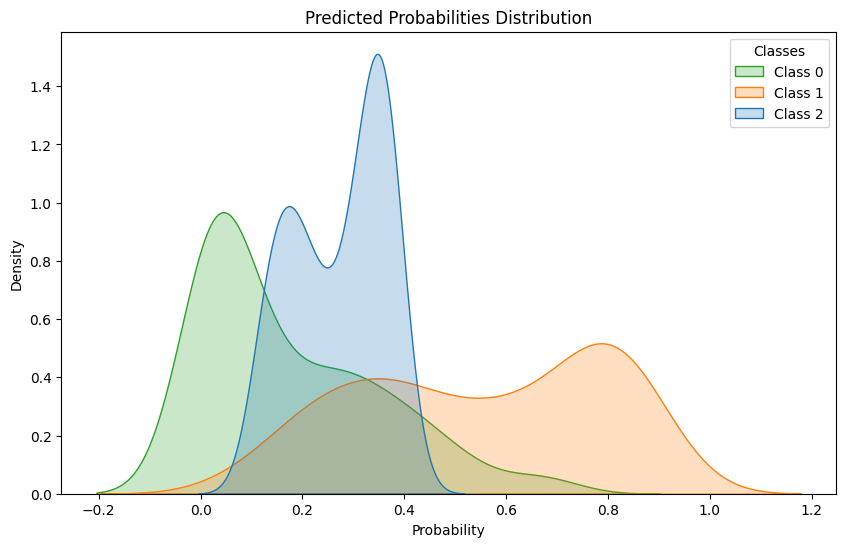

In [28]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=y_prob,fill=True)
plt.legend(title = "Classes",labels = [f'Class {i}' for i in range(y_prob.shape[1])])
plt.title('Predicted Probabilities Distribution')
plt.xlabel('Probability')
plt.ylabel('Density')
plt.show